In [241]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from helpers import preproc_material 

In [277]:
SHEET_URL = 'https://docs.google.com/spreadsheets/d/1hMohZ1m7PjKro6NAdXuMZ854H_L0KN6Z9Z8SgwzjdpY/edit#gid=0'
url = SHEET_URL.replace('/edit#gid=', '/export?format=csv&gid=')

data = pd.read_csv(url)
data.head()

,url,doi,Spinel,temperature_1,time_1,temperature_2,time_2,base,mass_base,dopant,...,name_salt1,salt_2,name_salt2,solvent,volume_solvent,avg_size,density,structure,capacity,number_structure
0,https://sci-hub.ru/10.1016/j.ceramint.2019.10.105,doi:10.1016/j.ceramint.2019.10.105,NiCo2O4,90,12.0,400.0,3.0,urea,60 mmol,NaN,...,Nickel(II) nitrate hexahydrate,Co (NO3)2 6H2O,Cobalt(II) nitrate hexahydrate,H2O,280.0,24.0,20.0,urchin-like,295.0,1
1,https://sci-hub.ru/10.1016/j.ceramint.2019.10.105,doi:10.1016/j.ceramint.2019.10.105,NiCo2O4,90,12.0,400.0,3.0,urea,60 mmol,NaN,...,Nickel(II) nitrate hexahydrate,Co (NO3)2 6H2O,Cobalt(II) nitrate hexahydrate,H2O,280.0,24.0,30.0,urchin-like,250.0,1
2,https://sci-hub.ru/10.1016/j.ceramint.2019.10.105,doi:10.1016/j.ceramint.2019.10.105,NiCo2O4,90,12.0,400.0,3.0,urea,60 mmol,NaN,...,Nickel(II) nitrate hexahydrate,Co (NO3)2 6H2O,Cobalt(II) nitrate hexahydrate,H2O,280.0,24.0,40.0,urchin-like,237.0,1
3,https://sci-hub.ru/10.1016/j.ceramint.2019.10.105,doi:10.1016/j.ceramint.2019.10.105,NiCo2O4,90,12.0,400.0,3.0,urea,60 mmol,NaN,...,Nickel(II) nitrate hexahydrate,Co (NO3)2 6H2O,Cobalt(II) nitrate hexahydrate,H2O,280.0,24.0,60.0,urchin-like,225.0,1
4,https://sci-hub.ru/10.1007/s11664-017-5809-x,doi:10.1007/s11664-017-5809-x,NiCo2O4,140,12.0,300.0,3.0,urea,10 mmol,GO,...,Nickel(II) nitrate hexahydrate,Co (NO3)2 6H2O,Cobalt(II) nitrate hexahydrate,H2O,20.0,30.0,1.0,nanorods,710.0,2


In [278]:
data = data.drop(['url', 'doi', 'dopant', 'avg_size', 'number_structure', 'mass_dopant', 'heating_rate'], axis=1)
data = data.drop(['salt_1', 'salt_2'], axis=1)

In [279]:
def smi_to_mmol_mass(smi):
    m = 0
    mol = smiles_to_mol(smi)
    for atom in mol.GetAtoms():
        m += atom.GetMass()
    return m

def mol_name_to_smiles(name: str):
    return pcp.get_compounds(name, 'name')[0].isomeric_smiles

def preproc_material(mol_name, elem):
    if elem is np.nan:
        return np.nan
    smi = mol_name_to_smiles(mol_name)
    value, measure = elem.split()
    if measure == 'mmol':
        return float(value)
    if measure == 'g':
        return float(value) / smi_to_mmol_mass(smi)
    if measure == 'ml':
        return float(value)

x = data.iloc[0]
print(x.name_salt1, x.m_salt_1)
preproc_material(x.name_salt1, x.m_salt_1)

Nickel(II) nitrate hexahydrate 2 mmol


2.0

In [280]:
pcp.get_compounds('Ferrous chloride hexahydrate', 'name')[0].isomeric_smiles

'O.O.O.O.O.O.Cl[Fe]Cl'

In [281]:
map_plan = {
    'name_salt1' : 'm_salt_1',
    'name_salt2' : 'm_salt_2',
    'base' : 'mass_base',
}

for name, elem in map_plan.items():
    data[elem] = data.apply(lambda x: preproc_material(x[name], x[elem]), axis=1)
    


    # data.apply(lambda x: preproc_material(x.base, x.mass_base), axis=1)

In [282]:
data = data.drop(['solvent', 'mass_base', 'Spinel'], axis=1)

In [283]:
data

,temperature_1,time_1,temperature_2,time_2,base,m_salt_1,m_salt_2,name_salt1,name_salt2,volume_solvent,density,structure,capacity
0,90,12.0,400.0,3.0,urea,2.000000,1.000000,Nickel(II) nitrate hexahydrate,Cobalt(II) nitrate hexahydrate,280.0,20.0,urchin-like,295.0
1,90,12.0,400.0,3.0,urea,2.000000,1.000000,Nickel(II) nitrate hexahydrate,Cobalt(II) nitrate hexahydrate,280.0,30.0,urchin-like,250.0
2,90,12.0,400.0,3.0,urea,2.000000,1.000000,Nickel(II) nitrate hexahydrate,Cobalt(II) nitrate hexahydrate,280.0,40.0,urchin-like,237.0
3,90,12.0,400.0,3.0,urea,2.000000,1.000000,Nickel(II) nitrate hexahydrate,Cobalt(II) nitrate hexahydrate,280.0,60.0,urchin-like,225.0
4,140,12.0,300.0,3.0,urea,2.000000,1.000000,Nickel(II) nitrate hexahydrate,Cobalt(II) nitrate hexahydrate,20.0,1.0,nanorods,710.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,180,10.0,350.0,3.5,urea,0.004338,0.008658,Nickel(II) nitrate hexahydrate,Cobalt(II) nitrate hexahydrate,35.0,1.0,nanosheets,558.6
71,180,10.0,350.0,3.5,urea,0.004338,0.008658,Nickel(II) nitrate hexahydrate,Cobalt(II) nitrate hexahydrate,35.0,1.0,nanosheets,484.6
72,180,10.0,350.0,3.5,urea,0.004338,0.008658,Nickel(II) nitrate hexahydrate,Cobalt(II) nitrate hexahydrate,35.0,1.0,nanosheets,955.0
73,180,10.0,350.0,3.5,urea,0.004338,0.008658,Nickel(II) nitrate hexahydrate,Cobalt(II) nitrate hexahydrate,35.0,1.0,nanoflowers,368.0


In [333]:
#sns.pairplot(data);

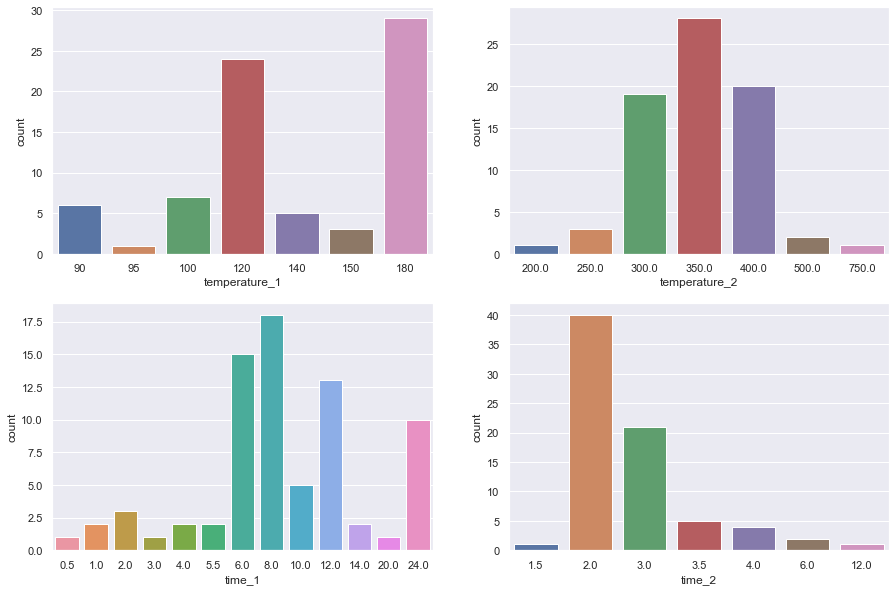

In [284]:
plt.rcParams["figure.figsize"] = (15, 10)
sns.set(style="darkgrid")

fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=False)
sns.countplot(x="temperature_1", data = data, ax=ax[0][0])
sns.countplot(x="temperature_2", data = data, ax=ax[0][1])
sns.countplot(x="time_1", data = data, ax=ax[1][0])
sns.countplot(x="time_2", data = data, ax=ax[1][1]);

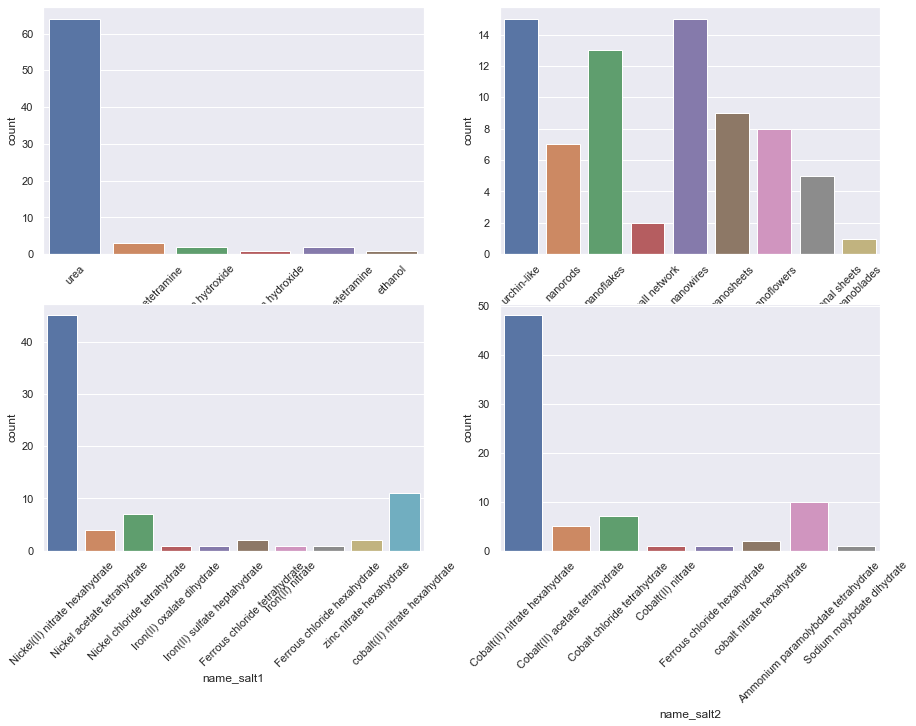

In [287]:
fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=False)
ax[0][0].tick_params(axis='x', rotation=45)
sns.countplot(x="base", data = data, ax=ax[0][0])

ax[0][1].tick_params(axis='x', rotation=45)
sns.countplot(x="structure", data = data, ax=ax[0][1]);

ax[1][0].tick_params(axis='x', rotation=45)
sns.countplot(x="name_salt1", data = data, ax=ax[1][0])

ax[1][1].tick_params(axis='x', rotation=45)
sns.countplot(x="name_salt2", data = data, ax=ax[1][1]);

<AxesSubplot:>

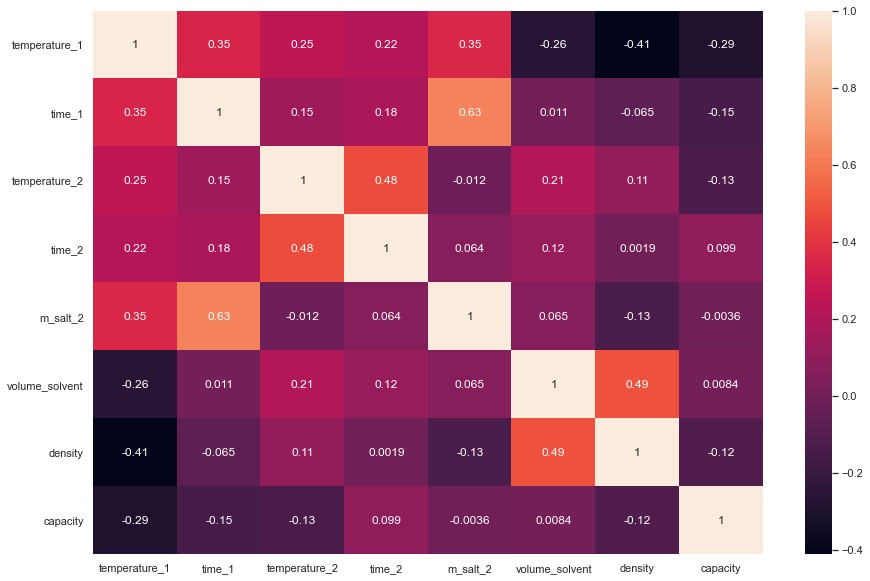

In [291]:
sns.heatmap(data.corr(), annot=True)

In [290]:
# высокая корреляция с m_salt2
data = data.drop(['m_salt_1'], axis=1)

<AxesSubplot:xlabel='density', ylabel='capacity'>

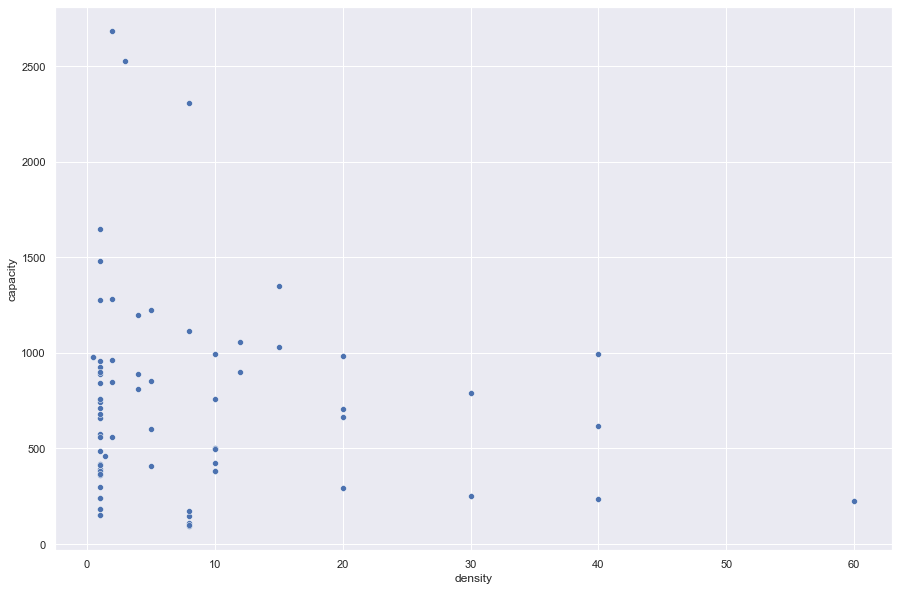

In [294]:
sns.scatterplot(x="density", y='capacity', data = data)

In [295]:
import plotly.express as px

In [299]:
# px.scatter(data, x='density', y='capacity', color='url', symbol='url');

In [297]:
data.to_csv('clear_data.csv')

In [177]:
# capacity predict
y = data.capacity
x = data.drop(['capacity'], axis=1)

In [100]:
from rdkit import Chem
from rdkit.Chem import AllChem

In [101]:
# SHEET_URL = 'https://docs.google.com/spreadsheets/d/1hMohZ1m7PjKro6NAdXuMZ854H_L0KN6Z9Z8SgwzjdpY/edit#gid=939348902'
# url = SHEET_URL.replace('/edit#gid=', '/export?format=csv&gid=')

# smiles_map = pd.read_csv(url)
# smiles_map.head()

In [102]:
# smiles = {}
# for i in range(smiles_map.shape[0]):
#     row = smiles_map.iloc[i]
#     smiles[row.form] = row.smiles  

In [16]:
data['smiles'] = data.apply(lambda row: smiles[row.salt_1], axis=1)

In [20]:
data.head()

,url,temperature_1,time_1,temperature_2,time_2,base,mass_base,dopant,mass_dopant,velocity,m_salt_1,m_salt_2,salt_1,salt_2,volume_solvent,avg_size,structure,capacity,density,smiles
0,https://sci-hub.ru/10.1016/j.ceramint.2019.10.105,90,12.0,400,3,urea,60.0,NaN,NaN,NaN,2.0,1.0,Ni(NO3)2 6H2O,Co (NO3)2 6H2O,280.0,24.0,urchin-like,295.0,20.0,O.O.O.O.O.O.[N+](=O)([O-])[O-].[N+](=O)([O-])[...
1,https://sci-hub.ru/10.1016/j.ceramint.2019.10.105,90,12.0,400,3,urea,60.0,NaN,NaN,NaN,2.0,1.0,Ni(NO3)2 6H2O,Co (NO3)2 6H2O,280.0,24.0,urchin-like,250.0,30.0,O.O.O.O.O.O.[N+](=O)([O-])[O-].[N+](=O)([O-])[...
2,https://sci-hub.ru/10.1016/j.ceramint.2019.10.105,90,12.0,400,3,urea,60.0,NaN,NaN,NaN,2.0,1.0,Ni(NO3)2 6H2O,Co (NO3)2 6H2O,280.0,24.0,urchin-like,237.0,40.0,O.O.O.O.O.O.[N+](=O)([O-])[O-].[N+](=O)([O-])[...
3,https://sci-hub.ru/10.1016/j.ceramint.2019.10.105,90,12.0,400,3,urea,60.0,NaN,NaN,NaN,2.0,1.0,Ni(NO3)2 6H2O,Co (NO3)2 6H2O,280.0,24.0,urchin-like,225.0,60.0,O.O.O.O.O.O.[N+](=O)([O-])[O-].[N+](=O)([O-])[...
4,https://sci-hub.ru/10.1007/s11664-017-5809-x,140,12.0,300,3,urea,10.0,GO,12.0,1,2.0,1.0,Ni(NO3)2 6H2O,Co (NO3)2 6H2O,20.0,30.0,nanorods,710.0,1.0,O.O.O.O.O.O.[N+](=O)([O-])[O-].[N+](=O)([O-])[...


In [34]:
data.smiles.apply(Chem.MolFromSmiles);

In [27]:
mol = Chem.MolFromSmiles(smi)
# mol = Chem.MolToSmiles(mol)

In [154]:
from helpers import *

In [155]:
fp = []
for i in range(data.shape[0]):
    row = data.iloc[0]
    fp.append(morgan_fingerprint(row.smiles))
    
preproc_data = pd.concat([data, pd.DataFrame(fp)], axis=1)

In [54]:
preproc_data = pd.concat([data, pd.DataFrame(fp)], axis=1)

In [61]:
preproc_data.drop(['dopant', 'mass_dopant', 'avg_size', 'velocity', 'url', 'density', 'salt_1', 'salt_2', 'structure'], axis=1, inplace=True)

In [63]:
preproc_data.head()

,temperature_1,time_1,temperature_2,time_2,base,mass_base,m_salt_1,m_salt_2,volume_solvent,structure,...,114,115,116,117,118,119,120,121,122,123
0,90,12.0,400,3,urea,60.0,2.0,1.0,280.0,urchin-like,...,0,0,0,0,0,0,0,0,0,0
1,90,12.0,400,3,urea,60.0,2.0,1.0,280.0,urchin-like,...,0,0,0,0,0,0,0,0,0,0
2,90,12.0,400,3,urea,60.0,2.0,1.0,280.0,urchin-like,...,0,0,0,0,0,0,0,0,0,0
3,90,12.0,400,3,urea,60.0,2.0,1.0,280.0,urchin-like,...,0,0,0,0,0,0,0,0,0,0
4,140,12.0,300,3,urea,10.0,2.0,1.0,20.0,nanorods,...,0,0,0,0,0,0,0,0,0,0


In [68]:
# capacity predict
y = preproc_data.capacity
x = preproc_data.drop(['capacity'], axis=1)

In [71]:
preproc_data.describe()

,temperature_1,time_1,temperature_2,time_2,mass_base,m_salt_1,m_salt_2,volume_solvent,capacity,0,...,114,115,116,117,118,119,120,121,122,123
count,48.000000,48.000000,48.000000,48.000000,43.000000,48.000000,48.000000,47.000000,48.000000,48.0,...,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0
mean,126.458333,9.416667,339.583333,2.479167,26.329039,14.356067,13.709459,107.255319,933.962500,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,27.013754,6.200835,44.909286,0.583080,34.148526,32.745131,32.987013,93.491796,558.137716,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,90.000000,2.000000,250.000000,2.000000,0.000499,0.002488,0.001317,20.000000,225.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,115.000000,6.000000,300.000000,2.000000,4.000000,2.000000,1.000000,50.000000,614.250000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,120.000000,8.000000,350.000000,2.000000,15.000000,2.000000,1.000000,70.000000,828.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,140.000000,12.000000,350.000000,3.000000,24.000000,4.000000,2.000000,100.000000,1071.750000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,180.000000,24.000000,500.000000,4.000000,100.000000,100.000000,100.000000,320.000000,2681.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import mean_squared_error

In [73]:
preproc_data.to_csv('fp_preproc_data.csv')

In [75]:
import pubchempy as pcp

In [125]:
pcp.get_compounds('FeCl2', 'formula')[1].iupac_name

'iron(2+);dichloride'

In [ ]:
'dichloroiron', 

In [300]:
# data.smiles.apply(lambda name: pcp.get_compounds(name, 'name')[0]).isomeric_smiles

In [144]:
c = pcp.get_compounds('Ni', 'name')[0]
c.isomeric_smiles

c.isomeric_smiles

'[Ni]'

In [151]:
mol = smiles_to_mol(c.isomeric_smiles)

In [152]:
m = 0
for atom in mol.GetAtoms():
    m += atom.GetMass()
    

In [153]:
m

58.693

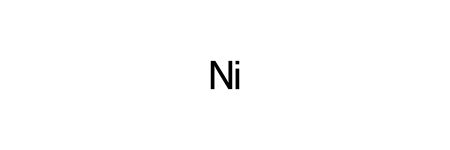

In [150]:
Chem.MolFromSmiles(c.isomeric_smiles)